In [7]:
from boundmixofgaussians import findpeak, compute_sum, compute_grad
import numpy as np
np.set_printoptions(suppress=True,precision=6)
import matplotlib.pyplot as plt
%matplotlib inline
from GPAdversarialBound import getallchanges, zeromean_gaussian, getbound, AdversBound, compute_bounds
from GPAdversarialBound.logistic import get_logistic_result
from GPAdversarialDatasets import getMNISTexample, getbankexample, getcreditexample, getspamexample,getsynthexample

# from GPAdversarialBound.test import testing
# testing()

## MNIST Demo

In [5]:
trainingN = 100
testN = 200
fullX,Y = getMNISTexample(scalingfactor=4,Ntraining=trainingN+testN,splittype='35') #4
keep = np.max(fullX,0)>50 #150
X = fullX[:,keep]
X=X-np.min(X,0)
X=X/np.max(X,0)
X = X*1.0
Y = Y*1.0
Y[Y==0]=-1
Xtest = X[trainingN:,:]
Ytest = Y[trainingN:,:]
Xtrain = X[0:trainingN,:]
Ytrain = Y[0:trainingN,:]

Comparing 3 vs 5


Comparing sparse approximation with basic result

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance
reconstraining parameters gp_classification.rbf.variance


0.625
[2.274482]
0.6
[1.428104]


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 4.,
        2., 5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 1 Patch objects>)

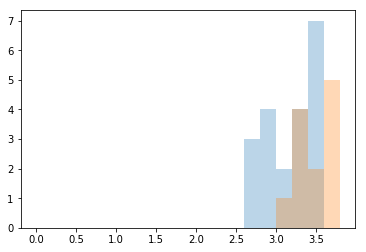

In [6]:
results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1, 4, 1.0, 0.5, 0.0001,2)
print(accuracy)
print(np.diff(abCI))
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2),alpha=0.3)

results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,False, 1.0, 0.5, 0.0001,2)
print(accuracy)
print(np.diff(abCI))
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2),alpha=0.3,histtype='stepfilled')

The distance between the 5th and 95th percentile training points is reported above in [brackets]. Both computations seem to end up above these thresholds.

There is an additional process in which the largest results are recomputed with a tighter bound:

reconstraining parameters gp_classification.rbf.variance
reconstraining parameters sparse_gp.rbf.variance


2.6079 --> 1.3344
1.3344 2.2882 2.5983
2.5983 --> 1.3700
1.3344 2.2200 2.5932
2.5932 --> 1.3555
1.3344 2.1512 2.5909
2.5909 --> 1.3451
1.3344 2.0820 2.5612
2.5612 --> 1.4119
1.3344 2.0181 2.5571
2.5571 --> 1.5164
1.3344 1.9603 2.5452
2.5452 --> 1.3643
1.3344 1.8947 2.4514
2.4514 --> 1.7524
1.3344 1.8559 2.4413
2.4413 --> 1.3664
1.3344 1.7962 2.3977
2.3977 --> 1.7143
1.3344 1.7582 2.3606
0.7


(array([0., 0., 0., 0., 0., 0., 6., 2., 2., 2., 2., 4., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8]),
 <a list of 19 Patch objects>)

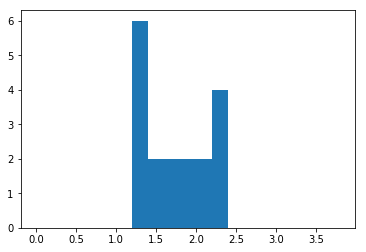

In [13]:
results, _, _, accuracy, abCI = compute_bounds(Xtrain,Ytrain,Xtest,Ytest,1,4, 1.0, 0.5, 0.0001,2,50,2,(7, 10))
print(accuracy)
plt.hist([np.max(res[0]) for res in results],bins=np.arange(0,4,0.2))

In [15]:
print(np.diff(abCI))

[2.730865]


In the above example all the possible paths considered are now below this threshold, so we know at least two pixels need changing.

We can compare with logistic regression:

In [14]:
logres = get_logistic_result(Xtrain,Ytrain,Xtest,Ytest)
print("C, Score, cumulativelatents[0], cumulativelatents[1], cumulativelatents[2], cumulativelatents[3], cumulativelatents[4], ci, pixelsneeded")
for r in logres:
    print("%0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %0.2f, %d" % tuple(r))

C, Score, cumulativelatents[0], cumulativelatents[1], cumulativelatents[2], cumulativelatents[3], cumulativelatents[4], ci, pixelsneeded
0.01, 50.00, 0.03, 0.06, 0.08, 0.11, 0.13, 0.10, 3
0.01, 50.00, 0.04, 0.07, 0.10, 0.13, 0.15, 0.11, 3
0.01, 50.00, 0.05, 0.08, 0.12, 0.16, 0.18, 0.14, 3
0.01, 53.00, 0.06, 0.10, 0.15, 0.19, 0.22, 0.16, 3
0.01, 57.00, 0.07, 0.12, 0.18, 0.23, 0.27, 0.20, 3
0.02, 60.00, 0.08, 0.15, 0.21, 0.27, 0.32, 0.23, 3
0.02, 64.00, 0.10, 0.18, 0.25, 0.33, 0.38, 0.27, 3
0.03, 62.00, 0.11, 0.21, 0.30, 0.39, 0.45, 0.32, 3
0.03, 63.50, 0.13, 0.25, 0.36, 0.46, 0.54, 0.38, 3
0.04, 67.00, 0.16, 0.29, 0.42, 0.55, 0.64, 0.44, 3
0.05, 68.50, 0.18, 0.35, 0.50, 0.65, 0.75, 0.51, 3
0.06, 68.00, 0.21, 0.40, 0.59, 0.76, 0.88, 0.58, 2
0.07, 67.50, 0.25, 0.47, 0.68, 0.88, 1.03, 0.67, 2
0.09, 68.50, 0.28, 0.55, 0.79, 1.03, 1.20, 0.76, 2
0.11, 69.00, 0.32, 0.63, 0.92, 1.18, 1.38, 0.86, 2
0.14, 69.00, 0.37, 0.72, 1.05, 1.36, 1.58, 0.96, 2
0.17, 69.50, 0.42, 0.82, 1.20, 1.55, 1.81, 1.07